<a href="https://colab.research.google.com/github/ach224/Prediction_eligibilite_pret_bancaire/blob/Etape-1-2-(data-cleaning-%2B-EDA)---A%C3%AFcha/PDT1_Etape_1_2_(data_cleaning_%2B_EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etape 1 : Compréhension et préparation des données

- Charger le dataset
- Comprendre les colonnes
- Vérifier valeurs manquantes, doublons, valeurs aberrantes
- Encoder variables catégorielles
- Normaliser / standardiser les variables numériques si nécessaire

In [1]:
# Importation des données
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
df = pd.read_csv("/content/drive/MyDrive/DATA SCIENCES/PROJET DATA SCIENCES/loan_prediction.csv")
df.shape

(614, 13)

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Nom des colonnes
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


On remarque qu'il n'y a pas le meme nombre de lignes dans chaque colonne.

In [6]:
# Connaître le nombre de valeurs différentes dans chaque colonne
for i in df.columns:
  if len(df[i].unique())> 4:
    print([i], "Il y a plus de 4 valeurs différentes.")
  else:
    print([i], df[i].unique())

['Loan_ID'] Il y a plus de 4 valeurs différentes.
['Gender'] ['Male' 'Female' nan]
['Married'] ['No' 'Yes' nan]
['Dependents'] Il y a plus de 4 valeurs différentes.
['Education'] ['Graduate' 'Not Graduate']
['Self_Employed'] ['No' 'Yes' nan]
['ApplicantIncome'] Il y a plus de 4 valeurs différentes.
['CoapplicantIncome'] Il y a plus de 4 valeurs différentes.
['LoanAmount'] Il y a plus de 4 valeurs différentes.
['Loan_Amount_Term'] Il y a plus de 4 valeurs différentes.
['Credit_History'] [ 1.  0. nan]
['Property_Area'] ['Urban' 'Rural' 'Semiurban']
['Loan_Status'] ['Y' 'N']


On va passer a des variables numériques pour que l'analyse soit plus fluide.
* Pour la colonne ['Gender'] : 0 = Male; 1 = Female;
* Pour la colonne ['Married'] : 0 = No; 1 = Yes;
* Pour la colonne ['Education'] : 0 = No graduate; 1 = Graduate;
* Pour la colonne ['Self_Employed'] : 0 = No; 1 = Yes;
* Pour la colonne ['Credit_History'] : 0 = 0.; 1 = 1.;
* Pour la colonne ['Loan_Status'] : 0 = No; 1 = Yes;
* Pour les colonnes ['Dependents'] ['CoapplicantIncome'] ['LoanAmount'] ['Loan_Amount_Term'] ['Credit_History'] : changer le type en int.

Avant de faire ça, on doit retirer les valeurs manquantes (nan) de chaque colonne.

In [7]:
# df = pd.read_csv("/content/drive/MyDrive/DATA SCIENCES/PROJET DATA SCIENCES/loan_prediction.csv")

In [8]:
# Connaitre le nombre de nan dans chaque colonne
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [9]:
# Visualisation des lignes contenant des données vides
df.isnull().all(axis=1).sum()

np.int64(0)

Il n'y a aucune ligne qui contient uniquement des données incomplètes donc pour gérer les nul, Pour chaque colonne, nous allons remplacer les null par la valeur la plus fréquente.

Nous avons d'un coté les colonnes à variable catégorielle : Gender, Married, Self_Employed, Education, Property_Area

Il y a également la colonne LoanAmount qui contient des valeurs numériques continues

La colonne Credit_History contient déjà des variables binaires (0,1)

La colonne Loan_Amount_Term contient des variables discrètes.

In [10]:
colonnes_cat = ["Gender", "Married", "Self_Employed", "Education", "Property_Area"]

for col in colonnes_cat:
    df[col] = df[col].fillna(df[col].mode()[0])

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Nous nous sommes débarassés de toutes les valeurs nulles, nous pouvons désormais changer les colonnes de variables catégorielles en numériques.

In [11]:
df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
df["Married"] = df["Married"].map({"No": 0, "Yes": 1})
df["Self_Employed"] = df["Self_Employed"].map({"No": 0, "Yes": 1})
df["Education"] = df["Education"].map({"Not Graduate": 0, "Graduate": 1})
df["Property_Area"] = df["Property_Area"].map({"Rural": 0, "Semiurban": 1, "Urban": 2})
df["Loan_Status"] = df["Loan_Status"].map({"N": 0, "Y": 1})
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
df['Credit_History'] = df['Credit_History'].astype(int)

print(df.dtypes)
print(df.head())

Loan_ID              object
Gender                int64
Married               int64
Dependents           object
Education             int64
Self_Employed         int64
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area         int64
Loan_Status           int64
dtype: object
    Loan_ID  Gender  Married Dependents  Education  Self_Employed  \
0  LP001002       0        0          0          1              0   
1  LP001003       0        1          1          1              0   
2  LP001005       0        1          0          1              1   
3  LP001006       0        1          0          0              0   
4  LP001008       0        0          0          1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                  0         128               360   
1             4583               1508         128               3

Désormais, on passe à la dernière étape de la partie 1 : la normalisation des valeurs.

In [12]:
from sklearn.preprocessing import StandardScaler

colonne_a_normaliser = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]

scaler = StandardScaler()
df[colonne_a_normaliser] = scaler.fit_transform(df[colonne_a_normaliser])

df[colonne_a_normaliser].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,0.072991,-0.554487,-0.211241,0.273231
1,-0.134412,-0.038731,-0.211241,0.273231
2,-0.393747,-0.554487,-0.948996,0.273231
3,-0.462062,0.251980,-0.306435,0.273231
4,0.097728,-0.554487,-0.056551,0.273231


# Etape 2 : Analyse exploratoire (EDA)

* Visualiser la distribution des variables
* Comparer revenus entre éligibles et non éligibles
* Étudier impact de Credit_History et Education
* Vérifier déséquilibre des classes dans Loan_Status

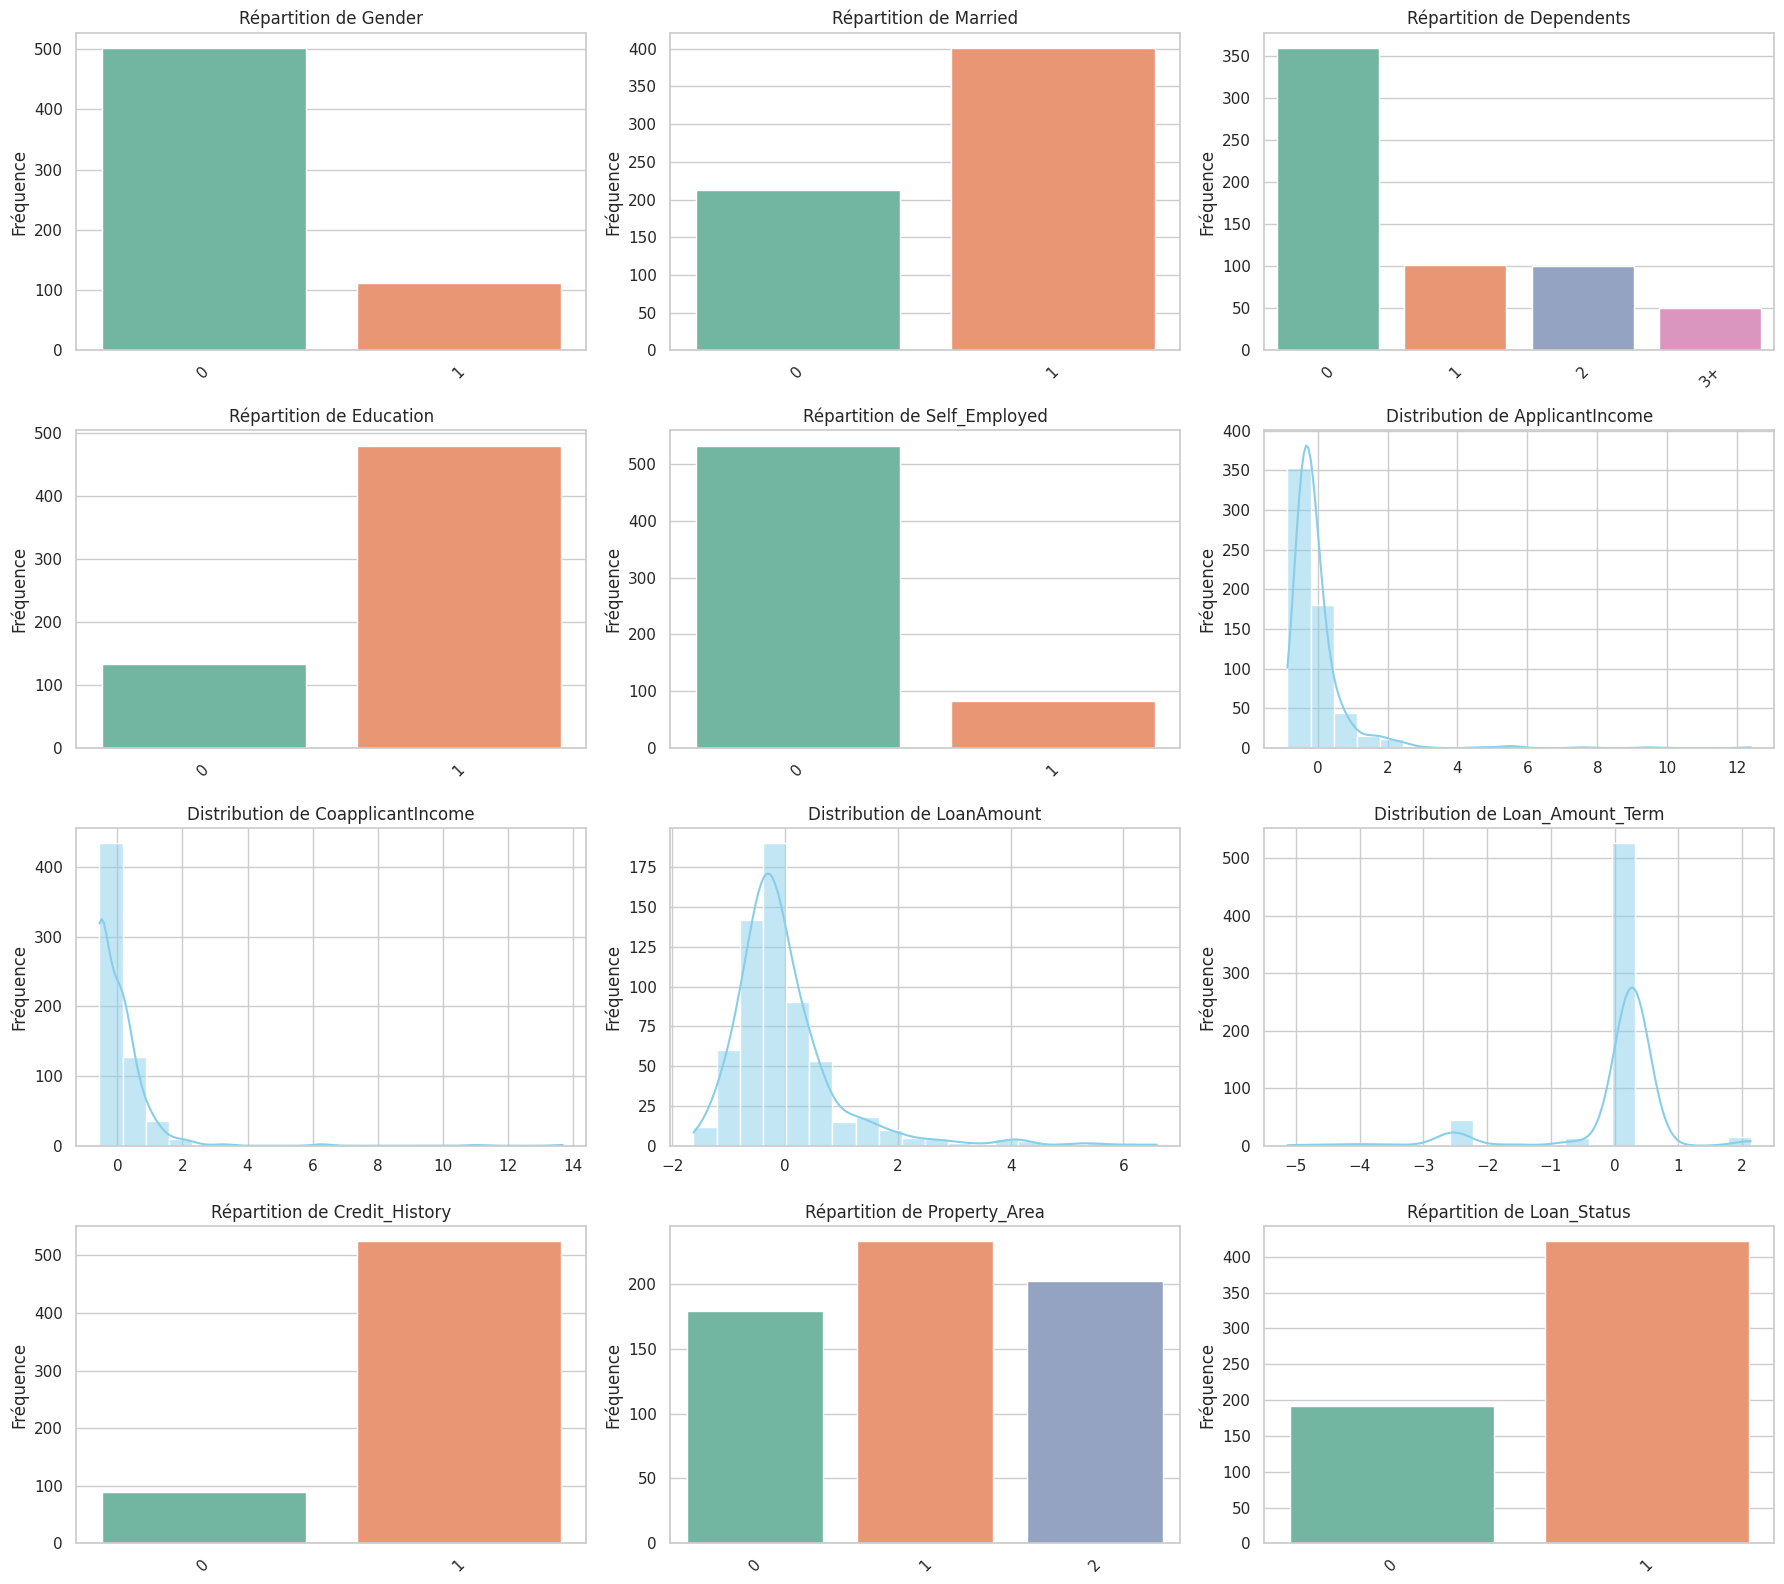

In [24]:
# Visualisation de la distribution des variables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Désactiver les warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set(style="whitegrid", palette="pastel")

# Garder toutes les colonnes sauf Loan_ID
cols = cols = df.columns[1:]

# nombre de graphiques par ligne
n_cols = 3
n_rows = int(np.ceil(len(cols) / n_cols))
plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)

    if df[col].dtype == 'object' or df[col].nunique() < 10:
        sns.countplot(x=col, data=df, palette="Set2", hue = None, legend = False)
        plt.title(f"Répartition de {col}")
        plt.xlabel("")
        plt.ylabel("Fréquence")
        plt.xticks(rotation=45)

    else:
        sns.histplot(df[col], bins=20, kde=True, color="skyblue")
        plt.title(f"Distribution de {col}")
        plt.xlabel("")
        plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()